In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Standard Normal Distribution

"Standard" refers to the fact that the distribution has mean equal to 0 and standard deviation equal to 1.

"Normal" refers to the fact that the distribution is bell-shaped (unimodal) and symmetric.

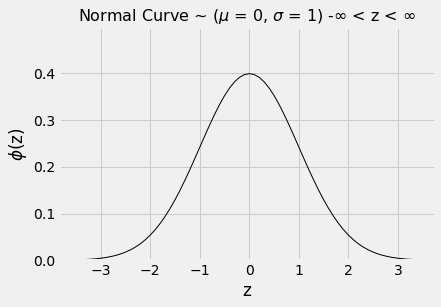

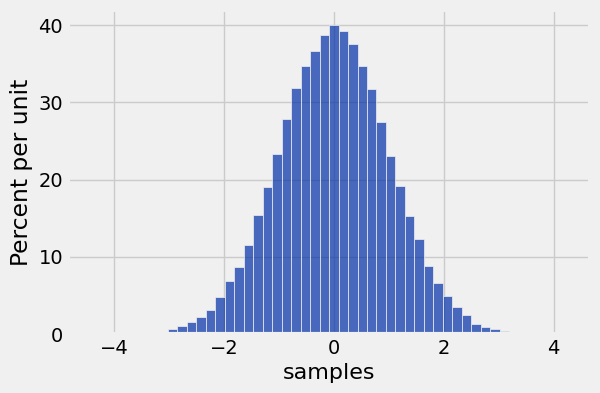

In [2]:
# Random sample of 100,000 values drawn from the standard normal distribution
samples_array = np.random.standard_normal(size=100000)
Table().with_column('samples', samples_array).hist(bins=50)

In [20]:
samples_array

array([-0.56551621,  0.78526655, -1.61346653, ...,  1.13829961,
        0.26858455,  0.80333325])

### What percent of data lies between -1 and 1 on this curve?


In [35]:
# Step 1: Use np.count_nonzero to find the number of values less than -1.
less_than = np.count_nonzero(samples_array < -1)

# Step 2: Use np.count_nonzero to find the number of values greater than 1.
more_than = np.count_nonzero(samples_array > 1)
# Step 3: Subtract from the total.
all_left_over = len(samples_array) - (less_than + more_than)
# Step 4: Convert to a percent.
percented = all_left_over / len(samples_array) * 100
percented

68.250999999999991

### What percent of data lies between -2 and 2 on this curve?


In [36]:
# Step 1: Use np.count_nonzero to find the number of values less than -1.
less_than = np.count_nonzero(samples_array < -2)

# Step 2: Use np.count_nonzero to find the number of values greater than 1.
more_than = np.count_nonzero(samples_array > 2)
# Step 3: Subtract from the total.
all_left_over = len(samples_array) - (less_than + more_than)
# Step 4: Convert to a percent.
percented = all_left_over / len(samples_array) * 100
percented

95.317999999999998

### What percent of data lies between -3 and 3 on this curve?

In [37]:
# Step 1: Use np.count_nonzero to find the number of values less than -1.
less_than = np.count_nonzero(samples_array < -3)

# Step 2: Use np.count_nonzero to find the number of values greater than 1.
more_than = np.count_nonzero(samples_array > 3)
# Step 3: Subtract from the total.
all_left_over = len(samples_array) - (less_than + more_than)
# Step 4: Convert to a percent.
percented = all_left_over / len(samples_array) * 100
percented

99.704999999999998

## Bell-Shaped, Symmetric, Nonstandard Distribution

In [38]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


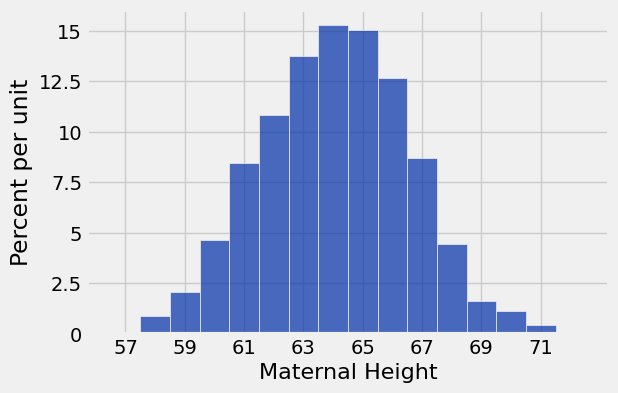

In [39]:

births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))
plots.xticks(np.arange(57, 72, 2));

### What percent of the data is at most one standard deviation from the mean?

In [18]:
# Computing the mean and standard deviation
heights = births.column('Maternal Height')
print(np.mean(heights))
print(np.std(heights))

64.0494037479
2.52502544097


In [51]:
# Step 1: Use np.count_nonzero to find the number of values less than -1.
less_than = np.count_nonzero(heights < -(np.std(heights) + np.mean(heights)))

# Step 2: Use np.count_nonzero to find the number of values greater than 1.
more_than = np.count_nonzero(heights > np.std(heights) + np.mean(heights))
# Step 3: Subtract from the total.
all_left_over = len(heights) - (less_than + more_than)
# Step 4: Convert to a percent.
percented = all_left_over / len(heights) * 100
percented

83.645655877342421

### What percent of the data is at most two standard deviations from the mean?

In [45]:
# Step 1: Use np.count_nonzero to find the number of values less than -1.
less_than = np.count_nonzero(heights < (-(np.std(heights) * 2) + np.mean(heights)))

# Step 2: Use np.count_nonzero to find the number of values greater than 1.
more_than = np.count_nonzero(heights > (np.std(heights) * 2) + np.mean(heights))
# Step 3: Subtract from the total.
all_left_over = len(heights) - (less_than + more_than)
# Step 4: Convert to a percent.
percented = all_left_over / len(heights) * 100
percented

97.189097103918229

### What percent of the data is at most three standard deviations from the mean?

In [46]:
# Step 1: Use np.count_nonzero to find the number of values less than -1.
less_than = np.count_nonzero(heights < (-(np.std(heights) * 3) + np.mean(heights)))

# Step 2: Use np.count_nonzero to find the number of values greater than 1.
more_than = np.count_nonzero(heights > (np.std(heights) * 3) + np.mean(heights))
# Step 3: Subtract from the total.
all_left_over = len(heights) - (less_than + more_than)
# Step 4: Convert to a percent.
percented = all_left_over / len(heights) * 100
percented

99.659284497444631

Write a function called bounded_by_sd. It takes two inputs: data_arr and num_sd. The function should return the percent of the data in data_arr that is at most num_sd standard deviations from the mean.

In [82]:
def bounded_by_sd(data_arr, num_sd):
    mean = np.mean(data_arr)
    sd = np.std(data_arr)

    lower = np.count_nonzero(data_arr < (-sd * num_sd) + mean)
    upper = np.count_nonzero(data_arr > (sd * num_sd) + mean)

    leftovers = len(data_arr) - (lower + upper)
    return (leftovers / len(data_arr)) * 100

In [86]:
# Test the function on the heights array.
bounded_by_sd(heights, 3)

99.659284497444631

## Summary of "The Empirical Rule"

For bell-shaped and symmetric distributions:

mean ± 1 SD captures about 68% of the data

mean ± 2 SDs captures about 95% of the data

mean ± 3 SDs captures about 99.73% of the data